<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Sampling%20Distribution%20and%20Central%20Limit%20Theorem/sampling_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sampling Distribution**

## Import Libraries and Packages

In [1]:
from scipy.stats import norm, uniform
from scipy.integrate import simps
import numpy as np
import matplotlib.pyplot as plt

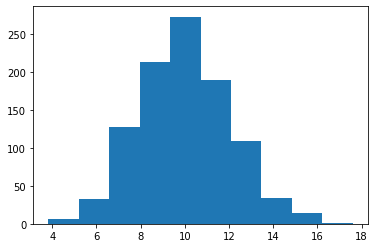

In [2]:
plt.hist(norm.rvs(loc=10, scale=2, size=1000));

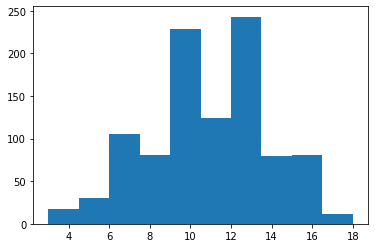

In [5]:
## imagine we want to figure out distribution of samples for rolling 3 normal dice

samples = np.ceil(uniform.rvs(loc=0, scale=6, size=(1000, 3))).sum(axis=1)
plt.hist(samples);

## **Rejection Sampling**

Let us say we don't have nice easy analytic distribution, and that we cannot use one to approximate our distribution. We can brute force our sampling by sampling the uniform distribution and just throwing away points. It works like this:

* 1. Sample a uniform **x** value
* 2. Sample a uniform **y** value form 0 to the maximum probability in your PDF.
* 3. If **y>p(x)**, throw out the point

Let's try and sample from the unnormalised distribution p(x) = sin(x^2) + 1 from 0->4

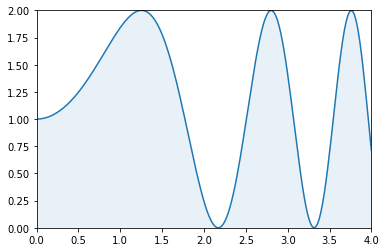

In [6]:
def pdf(x):
  return np.sin(x**2) + 1

xs = np.linspace(0,4,200)
ps = pdf(xs)
plt.plot(xs,ps)
plt.fill_between(xs, 0, ps, alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2);  

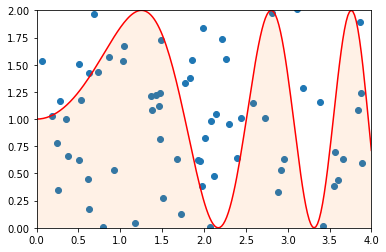

In [8]:
n = 100
random_x = uniform.rvs(loc=0, scale=4, size=n)
random_y = uniform.rvs(loc=0, scale=4, size=n)

plt.scatter(random_x, random_y)
plt.plot(xs,ps, c="r")
plt.fill_between(xs, 0, ps, alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2); 

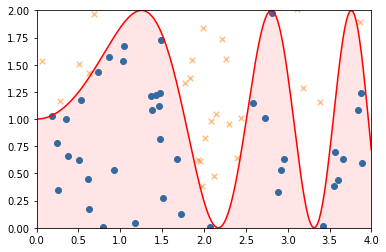

In [9]:
passed = random_y <= pdf(random_x)

plt.scatter(random_x[passed], random_y[passed])
plt.scatter(random_x[~passed], random_y[~passed], marker="x", s=30, alpha=0.5)
plt.plot(xs,ps, c="r")
plt.fill_between(xs, 0, ps, color="r", alpha=0.1)
plt.xlim(0,4)
plt.ylim(0,2);

## **Inverse Sampling**

This is harder to conceptually understand. The simplest way may be, for all the PDFs, the CDF is going to go from 0 to 1. If we can uniformly sample the CDF from 0 to 1, can we invert our function so that we can recover the x value that gives the sampled CDF value? For some functions yes. For some no. The math isn't solvable.

In [10]:
def pdf(x):
  return 3 * x**2

def cdf(x):
  return x**3

def icdf(cdf):
  return cdf**(1/3)      

((0.0, 1.0), (0.0, 3.0))

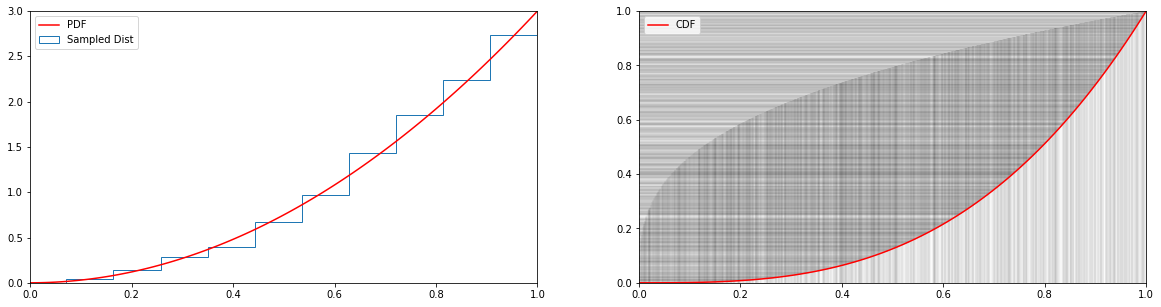

In [17]:
xs = np.linspace(0,1,100)
pdfs = pdf(xs)
cdfs = cdf(xs)
n = 2000
u_samps = uniform.rvs(size=n)
x_samps = icdf(u_samps)

fig, axes = plt.subplots(ncols=2, figsize=(20,5))
axes[0].plot(xs, pdfs, color="r", label="PDF")
axes[0].hist(x_samps, density=True, histtype="step", label="Sampled Dist")
axes[1].plot(xs, cdfs, color="r", label="CDF")
axes[1].hlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)
axes[1].vlines(u_samps, 0, x_samps, linewidth=0.1, alpha=0.3)

axes[0].legend(), axes[1].legend();
axes[1].set_xlim(0,1), axes[1].set_ylim(0,1)
axes[0].set_xlim(0,1), axes[0].set_ylim(0,3)